# I-HANK model

Variables\
A_hh: Houshold assets deflated with PNT \
A: Houshold assets nominal\
E_hh: Houshold expenditure deflated with PNT \
E: Nominal Houshold expenditure

Parameters follow notation from I-HANK docunemtation.\
New parameters are followed by _



In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from IHANKModel import IHANKModelClass
import figures 
import calculations


In [2]:
run_extra = True
lvl_path = ['U_hh', 'Walras', 'CB', 'i', 'NX', 'CA', 'ra', 'iF_s', 'UC_TH_hh', 'UC_NT_hh', 'iF_s']
paths = ['U_hh','PTH_s', 'PF_s', 'E', 'PF', 'YTH', 'YNT', 'CTF', 'CT', 'CNT','CTH_s', 'i', 'ra', 'iF_s']


In [ ]:
path_philips= ['WTH', 'WNT', 'NTH', 'NNT', 'PTH', 'PNT', 'UC_TH_hh', 'UC_NT_hh']


Share of domestic workers in tradable sector = 0.50
steady state found in 30.7 secs
ss.inc_TH = 0.350
ss.inc_NT = 0.350
par.nu_ = 0.672
par.alphaF = 0.333
par.varphiTH = 0.771
par.varphiNT = 0.773
ss.M_s = 0.167
ss.clearing_YTH =   0.00000000
ss.clearing_YNT =  -0.00000000
ss.G = 0.298
ss.NFA = 0.000


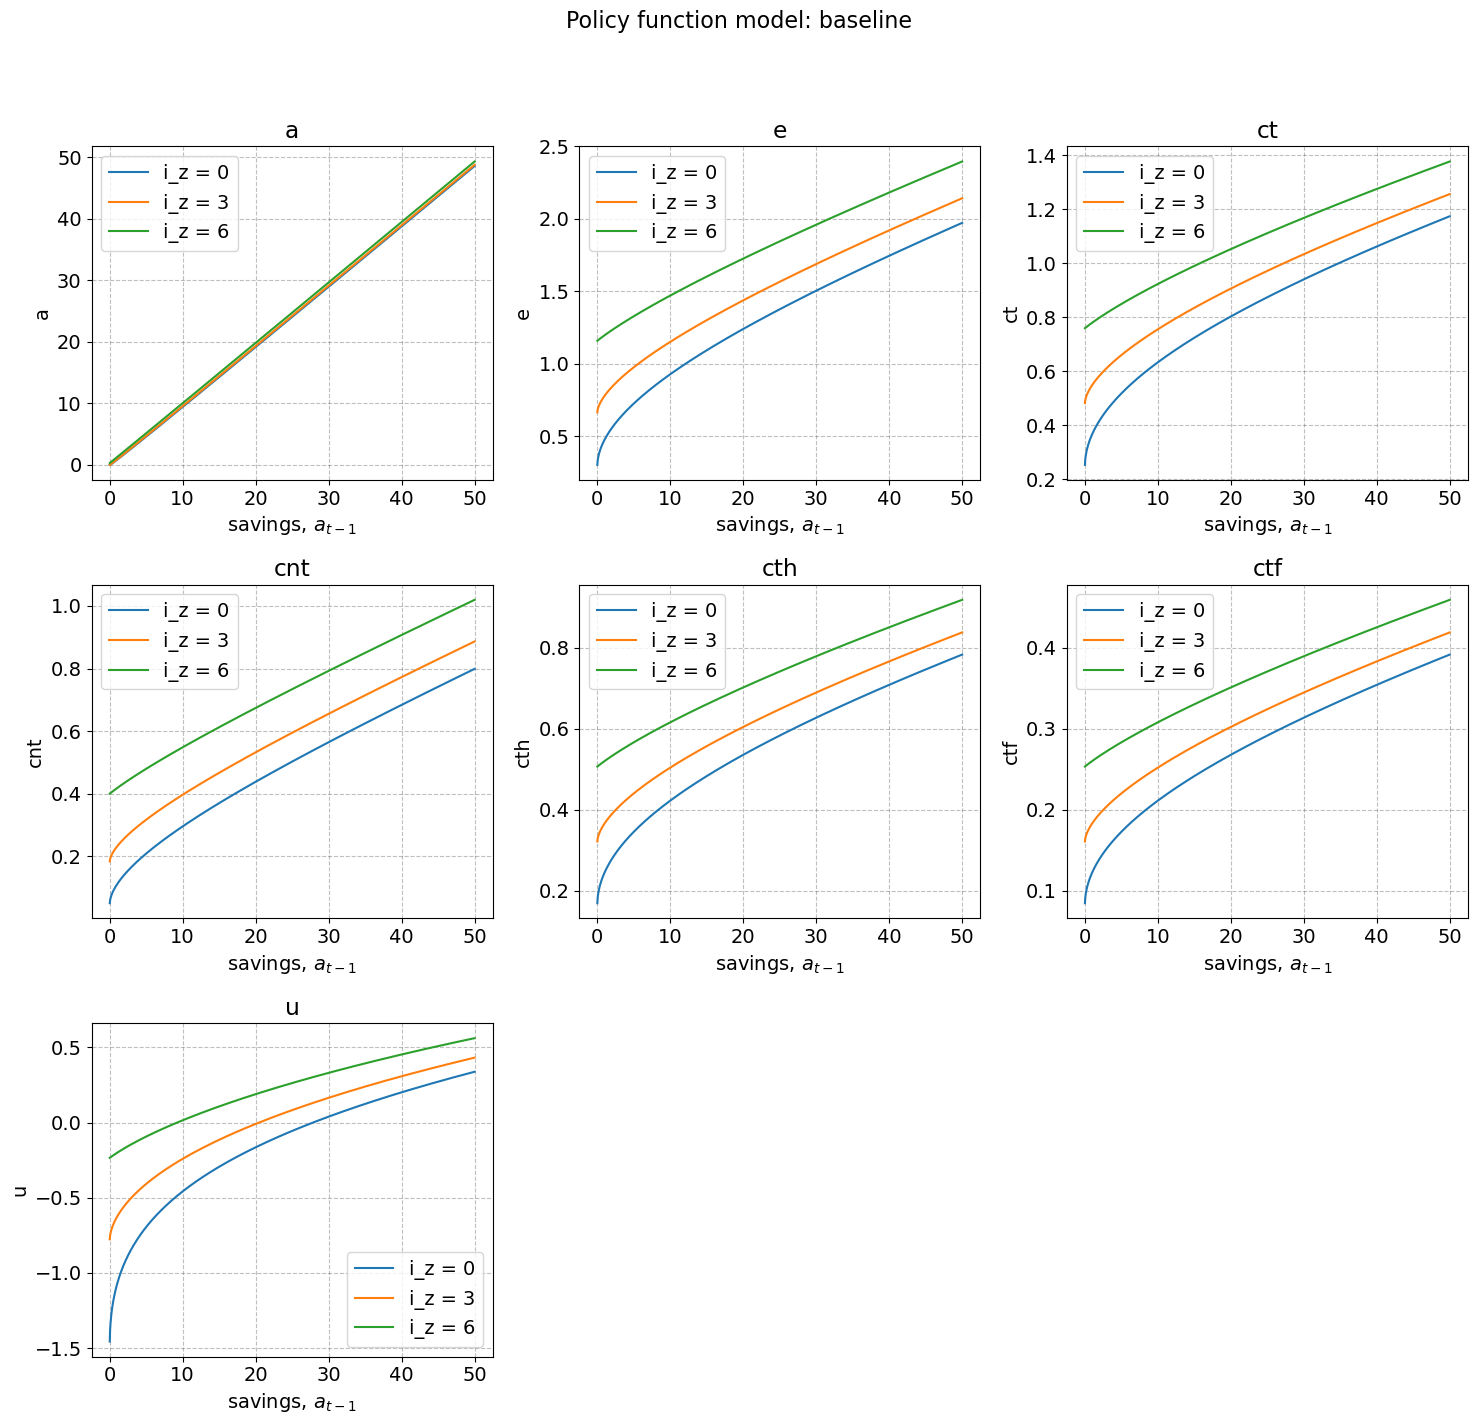

In [3]:
model = IHANKModelClass(name='baseline')
model.find_ss(do_print=True)
figures.plot_policy(model, ['a', 'e', 'ct', 'cnt', 'cth', 'ctf', 'u'])

In [4]:
shock_forigne_interest, shock_PF_s, shock_PF_s_taylor = calculations.difine_shocks(model)

In [ ]:
# Expenditure on tradable and non-tradable goods as a function of total expenditure
if run_extra:
    a_ = model.ss.a[0,3,:]*model.ss.PNT
    e_ = model.ss.e[0,3,:]*model.ss.PNT
    ect_ = model.ss.ct[0,3,:]*model.ss.PT
    ecnt_ = model.ss.cnt[0,3,:]*model.ss.PNT
    share_ = ect_/(ecnt_+ect_)

    plt.figure()
    plt.plot(e_,share_)
    plt.xlabel('Total expenditure')
    plt.ylabel('Expenditure share tradable goods')
    plt.title('Non-homothetic expenditure shares')

else: pass

In [ ]:
if run_extra: model.test_hh_path()

In [ ]:
if run_extra: model.test_ss()

In [ ]:
if run_extra: model.test_path()


In [5]:
model.compute_jacs()

In [ ]:
if run_extra: model.test_jacs()

In [ ]:
run_extra = True
if run_extra: 
    float = model.copy()
    float.par.jump_PF_s = +0.03 # initial jump
    float.par.rho_PF_s = 0.80 # AR(1) coefficeint

    float.find_transition_path(shocks=['PF_s'],do_print=False,do_end_check=False)
    float.show_IRFs(varnames=paths, lvl_value= lvl_path, do_shocks=False, do_targets=False, ncols=3, T_max=50)
else: pass


# No affect of a forigne price shock - ploting UIP 

The exchange rate is given by the inverse of the forigne price level.\
No change in the price of forign goods in domestic currency.


In [7]:
model.find_transition_path(shocks=shock_PF_s,do_print=False,do_end_check=False)

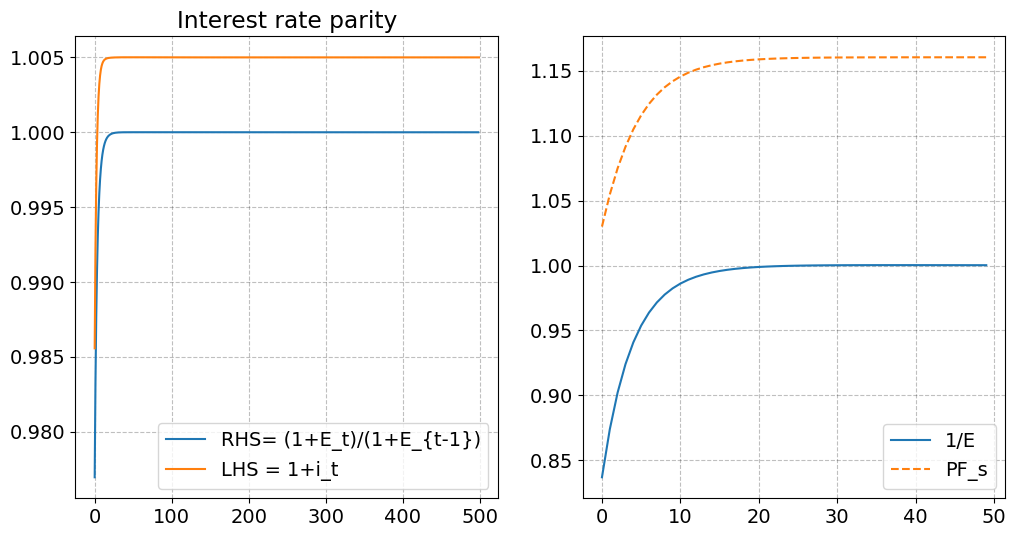

In [8]:
# Showing nothing happens to the domestic i
if run_extra: 
    path = model.path

    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(1,2,1)


# STORT PORBLEM ***
# Corrected code
    # ax1.plot((1 + path.E[1:, 0]) / (1 + path.E[:-1, 0]), label='RHS= (1+E_t)/(1+E_{t-1})')
    # ax1.plot((1+path.E[1,:])/(1+path.E[0,:]), label= 'RHS= (1+E_t)/(1+E_{t-1})')  
    ax1.plot( 1+ path.i, label = 'LHS = 1+i_t')

    ax1.legend()
    ax1.set_title('Interest rate parity')

    # Nominal exchange rate E absorbing the whole shock is consistent with no change in prices,
    # therefor no change in i and no change in 

    ax2 = fig.add_subplot(1,2,2)
    ax2.plot((path.E[0:50])**(-1), label= '1/E')
    ax2.plot((path.PF_s[:50]), label = 'PF_s', linestyle='--')
    ax2.legend()
else: pass

# Shock with a forign taylor rule

### Manual AR 1 shock 

In [ ]:
if run_extra:
    # More manual AR(1) shock 
    T_max = model.par.T//2 
    dPF_s = np.zeros(model.par.T)


    scale = 0.03
    rho = 0.8
    for t in range(T_max):
        dPF_s[t] = scale*rho**t

    model_check = model.copy()
    shocks = {'dPF_s': dPF_s}
    model_check.find_transition_path(shocks=shocks)

    model_check.compare_IRFs([model_check,float ], ['check', 'OG'], ['PF_s'], T_max=50, do_shocks=True, do_targets=False, ncols=3)
else: pass

### Taylor rule 

In [ ]:
# # Price shock 
# T_max = model.par.T//2 

# # Price shock 
# dPF_s = np.zeros(model.par.T)
# pi_plus = np.zeros(model.par.T)
# iF_s = np.zeros(model.par.T)
# drF = np.zeros(model.par.T)
# rF = np.zeros(model.par.T)
# scale = 0.03
# rho = 0.8

# for t in range(T_max):
#     dPF_s[t] = scale*rho**t

# # Prices
# PF_calc = dPF_s + 1

# iF_s[:] = model.ss.i
# rF[:]  = model.ss.rF
# # Inflation 
# for t in range(model.par.T-1):
#     pi_plus[t] = PF_calc[t+1]/ PF_calc[t] -1

#     iF_s[t] = (1+model.ss.i) * ((1+pi_plus[t])/(1+model.ss.pi))**model.par.phi -1
    
#     rF[t] = (iF_s[t] + 1)/(1+pi_plus[t])-1

#     drF[t] = model.ss.rF - rF[t]



# fig = plt.figure(figsize=(20,7))

# ax0 = fig.add_subplot(1,3,1)
# ax0.plot(pi_plus[:T_max], label='$\pi_{t+1}$')
# ax0.set_title('Inflation')

# ax1 = fig.add_subplot(1,3,2)
# ax1.plot(dPF_s[:T_max], label='$Price$')
# ax1.set_title('Price')

# ax2 = fig.add_subplot(1,3,3)
# ax2.plot(rF)
# ax2.set_title('Forigne real interest rate')

In [ ]:
# Inflation shock 
T_max = model.par.T//2 
scale = 0.03
rho = 0.8

# Price shock 
dPF_s = np.zeros(model.par.T)
pi = np.zeros(model.par.T) # 
PF_calc = np.zeros(model.par.T)
pi_plus = np.zeros(model.par.T)
iF_s = np.zeros(model.par.T)
rF = np.zeros(model.par.T)
drF = np.zeros(model.par.T)

# inflation from period t to t+1
for t in range(T_max):
    pi[t] = scale*rho**t


# Prices
for t in range(model.par.T):
    if t==0:
        PF_calc[t] = model.ss.PF_s*(1+pi[t])
    else:
        PF_calc[t] = PF_calc[t-1]*(1+pi[t])

dPF_s = PF_calc- model.ss.PF_s


# Interst rate following taylor rule 
for t in range(model.par.T):

    if t < model.par.T-1:
        pi_plus[t] = pi[t+1]

        iF_s[t] = (1+model.ss.i) * ((1+pi_plus[t])/(1+model.ss.pi))**model.par.phi -1
        
        rF[t] = (iF_s[t] + 1)/(1+pi_plus[t])-1

        drF[t] = model.ss.rF - rF[t]

    else:
        iF_s[t] = model.ss.i
        rF[t] = model.ss.rF




fig = plt.figure(figsize=(20,7))

ax0 = fig.add_subplot(1,3,1)
ax0.plot(pi[:T_max], label='$\pi_{t+1}$')
ax0.set_title('Inflation')

ax1 = fig.add_subplot(1,3,2)
ax1.plot(PF_calc[:T_max], label='$Price$')
ax1.set_title('Price')

ax2 = fig.add_subplot(1,3,3)
ax2.plot(rF)
ax2.set_title('Forigne real interest rate')

In [ ]:
# only interest rate shocl
model_rF =model.copy(name='Interest rate skock')

# shocks = { 'drF':drF}

model_rF.find_transition_path(shocks=shock_forigne_interest, do_end_check=False)

In [ ]:
model_rF.show_IRFs(varnames=paths, lvl_value= lvl_path, do_shocks=True, do_targets=False, ncols=3, T_max=50)

In [ ]:
# price and interest rate shock

model_taylor =model.copy(name='Forigne price shock with taylor rule')
shocks = {}
shocks = {'dPF_s': dPF_s, 'drF':drF}

model_taylor.find_transition_path(shocks=shocks, do_end_check=False)

In [ ]:
# only price shock (forigne Real interest rate rule)
model_real_rule =  model.copy(name='Forigne price shock with real rule')
shocks = {}
shocks = {'dPF_s': dPF_s}

model_real_rule.find_transition_path(shocks=shocks, do_end_check=False)

model_real_rule.show_IRFs(varnames=model.varlist, lvl_value= lvl_path, do_shocks=True, do_targets=False, ncols=3, T_max=100)

In [ ]:
model_taylor.compare_IRFs([model_taylor, model_real_rule], ['Taylor rule', 'Real rule'], model.varlist, T_max=50, lvl_value= lvl_path, do_shocks=False, do_targets=False, ncols=3)

In [ ]:
model_real_rule.path.UC_NT_hh[0]

In [ ]:
model.ss.UC_NT_hh

In [ ]:
lvl_path = ['Walras', 'CB', 'i', 'NX', 'CA', 'ra', 'iF_s', 'rF']
model_rF.compare_IRFs(models= [model_real_rule,model_taylor], labels=['model_real_rule', 'Taylor rule'], varnames=path_philips, lvl_value= lvl_path, T_max=50, do_shocks=False, do_targets=False, ncols=3)

In [ ]:
lvl_path = ['Walras', 'CB', 'i', 'NX', 'CA', 'ra', 'iF_s', 'rF']

model_taylor.show_IRFs(model.varlist, lvl_value= lvl_path, T_max=50, do_shocks=True, do_targets=False, ncols=3)

In [ ]:
model_taylor.show_IRFs(varnames=model.varlist, lvl_value=['Walras', 'i', 'iF_s', 
                                                         'ra'], T_max=50, ncols=3)

# Fixed exchange rate

In [ ]:
fixed = model.copy()
fixed.par.float = False
fixed.find_ss()

In [ ]:
if run_extra: fixed.test_ss()

In [ ]:
if run_extra: fixed.test_path()

In [ ]:
fixed.compute_jacs()

In [ ]:
if run_extra: fixed.test_jacs()

In [ ]:
fixed.par.jump_PF_s = -0.03 # initial jump
fixed.par.rho_PF_s = 0.80 # AR(1) coefficeint

fixed.find_transition_path(shocks=['PF_s'],do_print=False,do_end_check=True)

In [ ]:
lvl_path = ['Walras', 'CB', 'i']
path = ['i', 'E', ]
path_hh = ['CNT_hh', 'CT_hh', 'CTF_hh']

fixed.show_IRFs(varnames=paths, lvl_value= lvl_path, ncols=3,T_max=50)

In [ ]:
# Houshold variables 

In [ ]:
# Paths 
path_philips= ['WTH', 'WNT', 'NTH', 'NNT', 'PTH', 'PNT', 'UC_TH_hh', 'UC_NT_hh']
paths_hh = ['U_hh', 'CNT_hh', 'CT_hh', 'CTH', 'CTF', 'EX', 'inc_NT', 'inc_TH', 'ra']
paths_s = ['iF_s', 'rF', 'E', 'PF_s', 'PF', 'CHT_s']

In [ ]:
var_TBD = {
    'E': 'Nominal exchange rate (domestic currency per unit of foreign currency)',
    'CB': 'Central bank policy variable (e.g., money supply or interest rate rule)',
    'ZTH': 'Productivity shock in the home tradable sector',
    'ZNT': 'Productivity shock in the non-tradable sector',
    'NTH': 'Labor choose in the home tradable sector',
    'NNT': 'Labor choose in the non-tradable sector',
    'piWTH': 'Wage inflation in the home tradable sector',
    'piWNT': 'Wage inflation in the non-tradable sector',
    'YTH': 'Output of home tradable goods',
    'YNT': 'Output of non-tradable goods',
    'WTH': 'Wage in the home tradable sector',
    'WNT': 'Wage in the non-tradable sector',
    'PTH': 'Price of home tradable goods',
    'PNT': 'Price of non-tradable goods',
    'PF_s': 'Foreign price level (general foreign price index)',
    'PF': 'Foreign price level (converted to domestic currency)',
    'PTH_s': 'Price of home tradable goods in foreign currency',
    'PT': 'Price index for all tradable goods',
    'P': 'Aggregate domestic price level',
    'pi_F_s': 'Foreign inflation rate',
    'pi_F': 'Foreign inflation rate (converted to domestic currency)',
    'pi_NT': 'Inflation in the non-tradable sector',
    'pi_TH': 'Inflation in the home tradable sector',
    'pi_T': 'Inflation in the overall tradable sector',
    'pi': 'Overall inflation rate',
    'pi_TH_s': 'Inflation in home tradable goods in foreign currency',
    'i': 'Domestic nominal interest rate',
    'i_shock': 'Interest rate shock',
    'G': 'Real Government size',
    'B': 'Nominal Government debt (bonds)',
    'tau': 'Income Tax rate',
    'inc_TH': 'Income level in the home tradable sector',
    'inc_NT': 'Income level in the non-tradable sector',
    'ra': 'Real return on assets, in terms of the price of non-tradable goods',
    'p': 'Relative price (PNT/PT)',
    'beta': 'Discount factor',
    
    'A_hh': 'Household assets deflated with the price of non-tradable goods',
    'UC_TH_hh': 'Marginal utility of consumption of home tradable goods',
    'UC_NT_hh': 'Marginal utility of consumption of non-tradable goods',
    'E_hh': 'Household expectations of exchange rate',
    'CNT_hh': 'Household consumption of non-tradable goods',
    'CT_hh': 'Household consumption of tradable goods',
    'CTH_hh': 'Household consumption of home tradable goods',
    'CTF_hh': 'Household consumption of foreign tradable goods',
    'U_hh': 'Household utility',
    'M_s': 'Size of the forigne markets',
    'CT': 'Total consumption of tradable goods',
    'CNT': 'Total consumption of non-tradable goods',
    'CTF': 'Total consumption of foreign tradable goods',
    'CTH': 'Total consumption of home tradable goods',
    'CTH_s': 'Consumption of home tradable goods in foreign currency',
    'A': 'Aggregate assets',
    'EX': 'Expendiure',
    'wTH': 'Real wage in the home tradable sector',
    'wNT': 'Real wage in the non-tradable sector',
    'NKWCT_res': 'New Keynesian wage Phillips curve residual (tradable sector)',
    'NKWCNT_res': 'New Keynesian wage Phillips curve residual (non-tradable sector)',
    'rF': 'Foreign real interest rate',
    'UIP_res': 'Uncovered interest parity residual',
    'iF_s': 'Foreign nominal interest rate',
    'clearing_YTH': 'Market-clearing condition for home tradable goods',
    'clearing_YNT': 'Market-clearing condition for non-tradable goods',
    'GDP': 'Gross Domestic Product',
    'NX': 'Net exports',
    'CA': 'Current account balance',
    'NFA': 'Net foreign assets',
    'Walras': 'Walras’ Law residual (ensuring market-clearing conditions hold)'
}


In [ ]:
['E',
 'NTH',
 'NNT',
 'YTH',
 'YNT',
 'WTH',
 'WNT',
 'PTH',
 'PNT',
 'PF_s',
 'PF',
 'PTH_s',
 'PT',
 'P'
 'i',
 'i_shock',
 'G',
 'B',
 'tau',
 'inc_TH',
 'inc_NT',
 'ra',
 'p',
 'beta',
 'A_hh',
 'C_hh',
 'UC_TH_hh',
 'UC_NT_hh',
 'E_hh',
 'CNT_hh',
 'CT_hh',
 'CTH_hh',
 'CTF_hh',
 'M_s',
 'CT',
 'CNT',
 'CTF',
 'CTH',
 'CTH_s',
 'A',
 'EX',
 'wTH',
 'wNT',
 'rF',
 'iF_s',
 'GDP',
 'NX',
 'CA',
 'NFA']

In [ ]:
hh_var = ['ra','inc_TH', 'inc_NT', 'p']
models = {'model_real_rule': model_real_rule}

inputs_list = [['ra'], ['p'], ['inc_TH', 'inc_NT' ], 'all']

model_titles = {
    'fixed': 'Price shock, fixed E', 
    'model_taylor': 'Price shock forign taylor rule', 
    'model_real_rule': 'Price shock forign real rule',
}

for model_name, model in models.items():

    T_max = 50

    fig, (ax_C_NT, ax_C_TH) = plt.subplots(1, 2, figsize=(16, 4), dpi=100)
    fig.suptitle(f'{model_titles[model_name]}', fontsize=16)

    ax_C_NT.set_title('Consumption non-tradeable sector HH, $C_{NT}^{hh}$', fontsize=12)
    ax_C_TH.set_title('Consumption tradeable sector HH, $C_{TH}^{hh}$', fontsize=12)

    i_color = 0

    # for use_inputs in [[x] for x in model.inputs_hh]:
    for use_inputs in inputs_list:

        # a. compute
        path_alt = model.decompose_hh_path(do_print=False, use_inputs=use_inputs)

        # b. plot
        if use_inputs is None:
            label = 'No inputs'
            ls = '--'
            color = 'black' 
        elif use_inputs == 'all':
            label = 'All inputs'
            ls = '-'
            color = 'black'
        else:
            label = f'Only effect from {use_inputs[0]}'
            ls = '-'
            color = f'C{i_color}' # use color index directly
            i_color += 1

        ax_C_NT.plot((path_alt.CT_hh[:T_max] / model.ss.CT_hh - 1) * 100, ls=ls, color=color, label=label)
        ax_C_TH.plot((path_alt.CNT_hh[:T_max] / model.ss.CNT_hh - 1) * 100, ls=ls, color=color, label=label)

    for ax in [ax_C_NT, ax_C_TH]:
        ax.set_ylabel('% diff to s.s.')
        lgd = ax_C_TH.legend(frameon=True, ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()
  

In [ ]:
hh_var = ['ra','inc_TH', 'inc_NT', 'p']
models = {'model_real_rule': model_real_rule}

models = {'model_real_rule': model_real_rule, 'model_taylor': model_taylor}
inputs_list = [['ra'], ['p'], ['inc_TH', 'inc_NT' ], 'all']

model_titles = {
    'fixed': 'Price shock, fixed E', 
    'model_taylor': 'Price shock forign taylor rule', 
    'model_real_rule': 'Price shock forign real rule',
}

for model_name, model in models.items():

    T_max = 50

    fig, (ax_C_NT, ax_C_TH) = plt.subplots(1, 2, figsize=(16, 4), dpi=100)
    fig.suptitle(f'{model_titles[model_name]}', fontsize=16)

    ax_C_NT.set_title('$U^{hh}$', fontsize=12)
    ax_C_TH.set_title('Consumption tradeable sector HH, $C_{TH}^{hh}$', fontsize=12)

    i_color = 0

    # for use_inputs in [[x] for x in model.inputs_hh]:
    for use_inputs in inputs_list:

        # a. compute
        path_alt = model.decompose_hh_path(do_print=False, use_inputs=use_inputs)

        # b. plot
        if use_inputs is None:
            label = 'No inputs'
            ls = '--'
            color = 'black' 
        elif use_inputs == 'all':
            label = 'All inputs'
            ls = '-'
            color = 'black'
        else:
            label = f'Only effect from {use_inputs[0]}'
            ls = '-'
            color = f'C{i_color}' # use color index directly
            i_color += 1

        ax_C_NT.plot((path_alt.U_hh[:T_max] - model.ss.U_hh ) , ls=ls, color=color, label=label)
        ax_C_TH.plot((path_alt.CNT_hh[:T_max] - model.ss.CNT_hh ) , ls=ls, color=color, label=label)

    for ax in [ax_C_NT, ax_C_TH]:
        ax.set_ylabel('diff to s.s. abs')
        lgd = ax_C_TH.legend(frameon=True, ncol=1, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()
  

Tests

In [ ]:
model_highnu = model.copy(name='High nu')
model_highnu.par.nu = 2.0 
model_highnu.find_ss()
# model_highnu.compute_jacs()


In [ ]:
shocks = {'dPF_s': dPF_s, 'drF':drF}
model_highnu.find_transition_path(shocks = shocks, do_end_check=False)

In [ ]:
model_highnu.show_IRFs(varnames=paths, lvl_value= lvl_path, do_shocks=True, do_targets=False, ncols=3, T_max=50)

In [ ]:
model_highnu.compare_IRFs([model_highnu, model_real_rule], ['High nu', 'Real rule'], paths, T_max=50, lvl_value= lvl_path, do_shocks=False, do_targets=False, ncols=3)